## Different Augmentation method for SSL from 
##### [Self-supervision is not magic: Understanding Data Augmentation in Image Anomaly Detection](https://arxiv.org/abs/2208.07734)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import torchvision.transforms as transforms
from PIL import Image
import albumentations as A


from ssl_aug_methods import NormalSSL, ScarSSL, TogetherSSL, SSL3Way

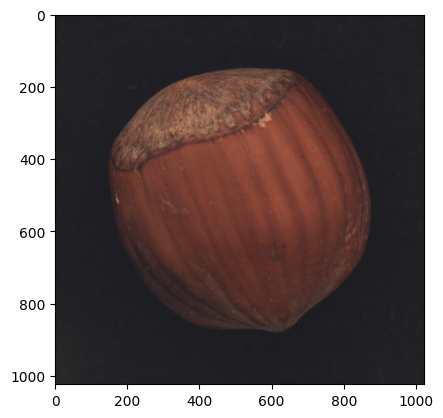

In [15]:
good_img_path = "Data/hazelnut/train/good/000.png"
good_img = Image.open(good_img_path)
# good_img_plt = cv.cvtColor(good_img, cv.COLOR_RGB2BGR)
plt.imshow(good_img)


### 1- Local Augmentation
#### 1.1- CutPaste

In [16]:
norm_ssl = NormalSSL()
orig_img, sp_img = norm_ssl(good_img)

in notmal ss1:  <class 'PIL.PngImagePlugin.PngImageFile'> (1024, 1024)


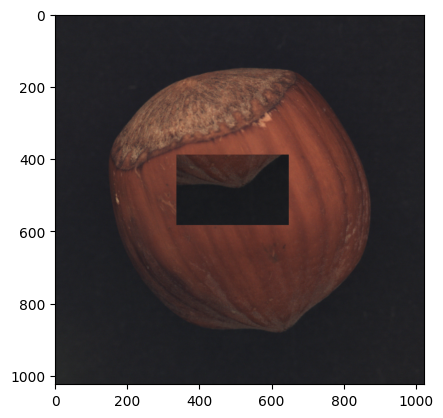

In [17]:
plt.imshow(sp_img)

#### 1.2- CutOut

In [20]:
transforms_cutout = A.Compose([
    A.Resize(256, 256), 
    A.CoarseDropout(max_holes = 1, # Maximum number of regions to zero out. (default: 8)
                    max_height = 128, # Maximum height of the hole. (default: 8) 
                    max_width = 128, # Maximum width of the hole. (default: 8) 
                    min_holes=None, # Maximum number of regions to zero out. (default: None, which equals max_holes)
                    min_height=None, # Maximum height of the hole. (default: None, which equals max_height)
                    min_width=None, # Maximum width of the hole. (default: None, which equals max_width)
                    fill_value=0, # value for dropped pixels.
                    mask_fill_value=None, # fill value for dropped pixels in mask. 
                    always_apply=False, 
                    p=0.5
                   )
])

cutout_img =  transforms_cutout(image=np.asarray(good_img))

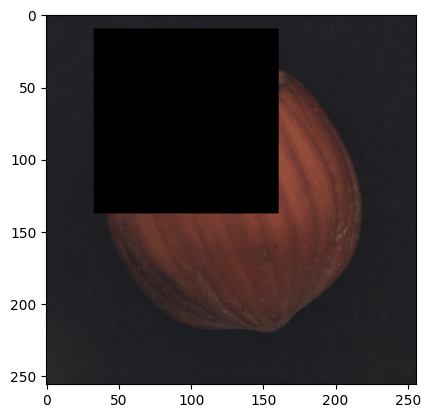

In [21]:
plt.imshow(cutout_img["image"])

#### 1.3- CutPaste-scar

In [22]:
scar_ssl = ScarSSL()
orig_img, scar_img = norm_ssl(good_img)

in notmal ss1:  <class 'PIL.PngImagePlugin.PngImageFile'> (1024, 1024)


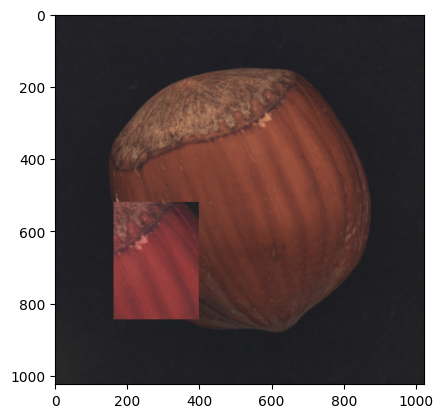

In [23]:
plt.imshow(scar_img)

### 2- Geometric AUgmentation
#### 2.1- Crop

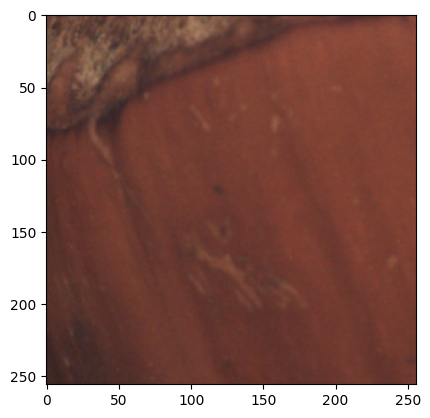

In [24]:
rand_crop_transform = A.Compose([
    A.RandomCrop(width=256, height=256)
])
rand_crop_img =  rand_crop_transform(image=np.asarray(good_img))
plt.imshow(rand_crop_img["image"])

#### 2.2- Rotate

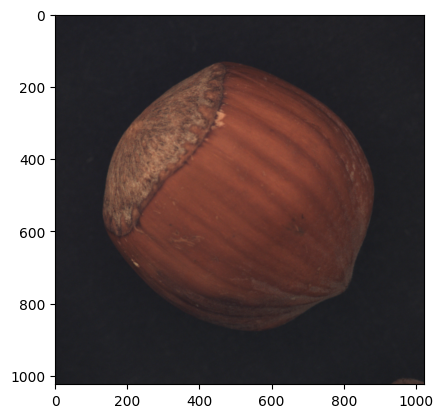

In [27]:
rotate_transform = A.Compose([
    A.Rotate(limit=45)
])
rotate_img =  rotate_transform(image=np.asarray(good_img))
plt.imshow(rotate_img["image"])

#### 2.3- Flip

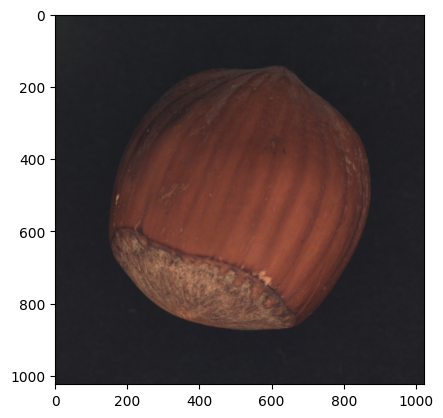

In [28]:
flip_transform = A.Compose([
    A.Flip(always_apply=True)
])
flip_img =  flip_transform(image=np.asarray(good_img))
plt.imshow(flip_img["image"])

### 3- Elementwise
#### 3.1- Blur

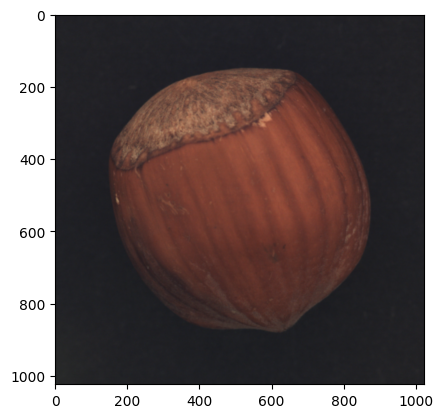

In [31]:
blur_transform = A.Compose([
    A.Blur(always_apply=True)
])
blur_img =  blur_transform(image=np.asarray(good_img))
plt.imshow(blur_img["image"])

#### 3.2- Noise

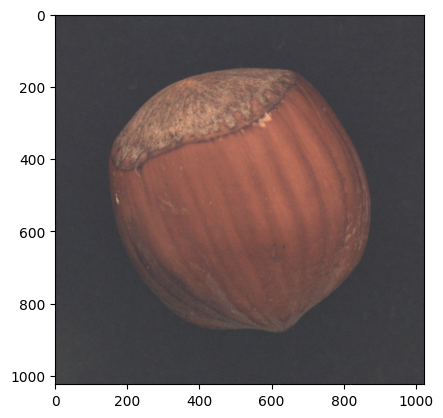

In [37]:
noise_transform = A.Compose([
    A.GaussNoise(var_limit=50, mean=30, always_apply=True)
])
noise_img =  noise_transform(image=np.asarray(good_img))
plt.imshow(noise_img["image"])

#### 3.3- Mask

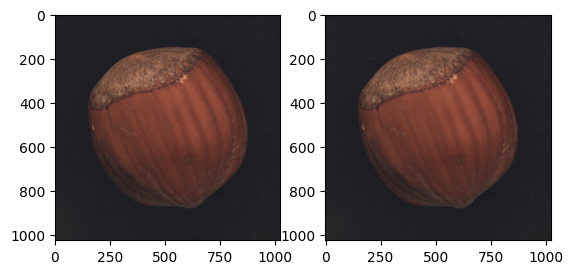

In [50]:
mask_transform = A.Compose([
    A.UnsharpMask(blur_limit= 111, alpha=1, threshold=128, always_apply=True)
])
mask_img =  mask_transform(image=np.asarray(good_img))
fig, axes = plt.subplots(1,2)
axes[0].imshow(good_img)
axes[1].imshow(mask_img["image"])

### 4- ColorBased
#### 4.1- Invert & Color (jittering)

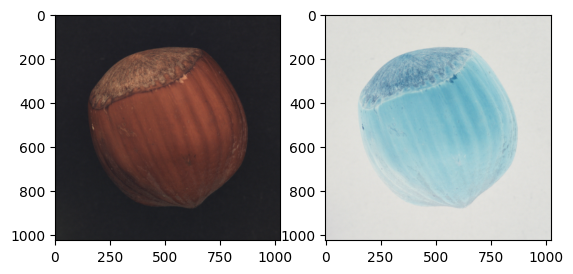

In [52]:
invert_transform = A.Compose([
    A.InvertImg(p=1)
])
invert_img =  invert_transform(image=np.asarray(good_img))
fig, axes = plt.subplots(1,2)
axes[0].imshow(good_img)
axes[1].imshow(invert_img["image"])

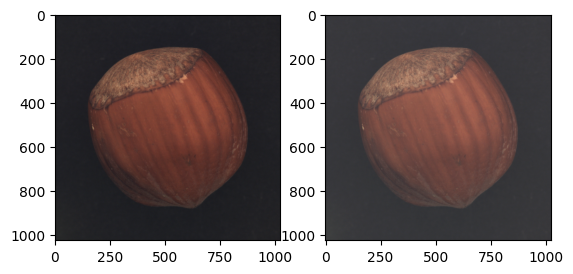

In [55]:
brightness_transform = A.Compose([
    A.RandomBrightnessContrast( always_apply=True)
])
brightness_img =  brightness_transform(image=np.asarray(good_img))
fig, axes = plt.subplots(1,2)
axes[0].imshow(good_img)
axes[1].imshow(brightness_img["image"])

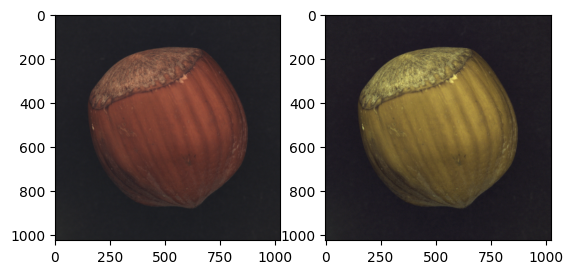

In [56]:
cjitter_transform = A.Compose([
    A.ColorJitter( always_apply=True)
])
cjitter_img =  cjitter_transform(image=np.asarray(good_img))
fig, axes = plt.subplots(1,2)
axes[0].imshow(good_img)
axes[1].imshow(cjitter_img["image"])

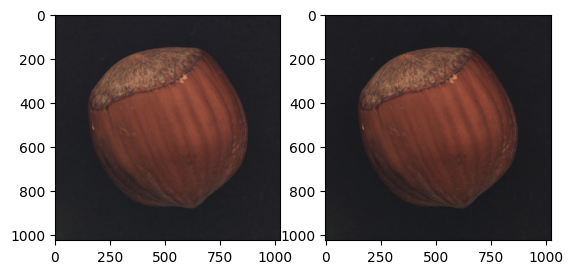

In [61]:
gamma_transform = A.Compose([
    A.RandomGamma( always_apply=True)
])
gamma_img =  gamma_transform(image=np.asarray(good_img))
fig, axes = plt.subplots(1,2)
axes[0].imshow(good_img)
axes[1].imshow(gamma_img["image"])

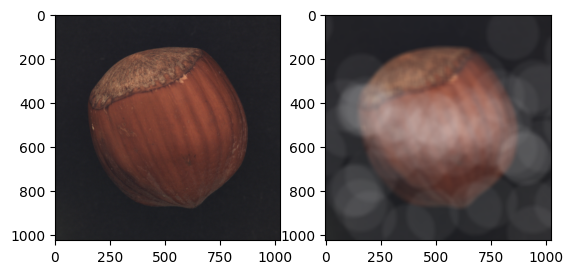

In [62]:
fog_transform = A.Compose([
    A.RandomFog( always_apply=True)
])
fog_img =  fog_transform(image=np.asarray(good_img))
fig, axes = plt.subplots(1,2)
axes[0].imshow(good_img)
axes[1].imshow(fog_img["image"])

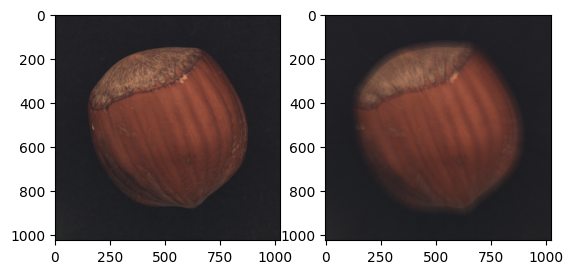

In [67]:
zb_transform = A.Compose([
    A.ZoomBlur( always_apply=True)
])
zb_img =  zb_transform(image=np.asarray(good_img))
fig, axes = plt.subplots(1,2)
axes[0].imshow(good_img)
axes[1].imshow(zb_img["image"])

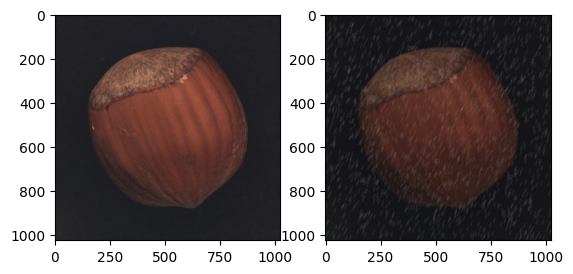

In [68]:
rain_transform = A.Compose([
    A.RandomRain( always_apply=True)
])
rain_img =  rain_transform(image=np.asarray(good_img))
fig, axes = plt.subplots(1,2)
axes[0].imshow(good_img)
axes[1].imshow(rain_img["image"])